In [1]:
import requests
import os
import tkinter as tk
from tkinter import messagebox
from PIL import ImageTk, Image

In [2]:
class ImageGenerator:
    """
    Generating image by using "limiwire.com" API.
    """
    def __init__(self) -> None:
        """
        Initializing ImageGenerator, saving basic configurations.
        """
        self.url:str = "https://api.limewire.com/api/image/generation"
        self.api_key:str = "Bearer lmwr_sk_SxSCHELSxN_G8b30GH8cDF21gyDlxzUxG9P9RAvVLLsLtpU6"
        
    def generate(self, text_prompt: str):
        """
        Generating image by using limiwire.com solution/ API.
        """
        payload:dict = {
            "prompt" : text_prompt,
            "aspect_ratio": "1:1"
        }
        headers:dict = {
            "Content-Type": "application/json",
            "X-Api-Version": "v1",
            "Accept": "application/json",
            "Authorization": self.api_key
        }
        data:dict = requests.post(self.url, json=payload, headers=headers).json()
        try:
            url_to_image:str = data["data"][0]["asset_url"]
            width_of_image:str = data["data"][0]["width"]
            height_of_image:str = data["data"][0]["height"]
            return url_to_image, width_of_image, height_of_image
        except KeyError:
            print("Maximum number of prompts reached!")
            return "", "", ""
    
    def generate_and_save_image(self, text_prompt):
        """
        Generating and saving image to the .jpg file.
        """
        url_to_image, _, _ = self.generate(text_prompt)
        if url_to_image != "":
            self.download_and_save_image(url_to_image)
            return True
        else:
            return False
    
    def get_id_of_last_image(self)->int:
        """
        Getting the last image id.
        """
        list_of_files = os.listdir()
        last_id:int = -1
        for file in list_of_files:
            if file.count("last_"):
                id:int = int(file.split("_")[-1].split(".")[0])
                if id > last_id:
                    last_id = id
        return last_id
    
    def download_and_save_image(self, url_to_image: str) -> None:
        """
        Dowloading and saving image.
        """     
        id = self.get_id_of_last_image() + 1
        name_of_file = f"last_image_{id}.jpg"
        image_data = requests.get(url_to_image).content
        with open(name_of_file, 'wb') as handler:
            handler.write(image_data)

image_generator = ImageGenerator()
image_generator.generate_and_save_image("Fallout dark")

True

In [3]:
class VenusImageGenerator:
    """
    Creating GUI and setting up image generator.
    """
    def __init__(self) -> None:
        """
        Initializing window/ GUI application.
        """
        self.app = tk.Tk()
        self.app.iconphoto(False, tk.PhotoImage(file="icon.png"))        
        self.app.title("Image Generator - Venus")
        self.app.geometry("800x550")
        self.app.resizable(False, False)
        
        self.image_generator = ImageGenerator()
        self.font = ("Times New Roman", 12, "bold") 
        
        ### CONFIGURATION
        self.app.columnconfigure(0, weight=1)
        self.app.columnconfigure(1, weight=1)
        self.app.rowconfigure(0, weight=1)
        self.app.rowconfigure(1, weight=1)
        
        # LEFT PANEL
        self.left_frame = tk.Frame(self.app, width=225, height=512)
        self.left_frame.grid(row=0, column=0, sticky="nsew")
        self.left_frame.grid_propagate(False)
        
        self.list_of_images = tk.Listbox(self.left_frame, width=40, justify="center", font=self.font)
        self.list_of_images.pack()
        self.fill_list_of_images()        
                
        self.button = tk.Button(self.left_frame, text="Change", command=self.select_image, font=self.font)
        self.button.pack(pady=1)
        
        self.label_prompt = tk.Label(self.left_frame, text="Enter prompt: ", font=self.font)
        self.label_prompt.pack(pady=1)
        
        self.prompt_entry = tk.Entry(self.left_frame, text="Prompt", width=40, justify="center", font=self.font)
        self.prompt_entry.pack(pady=1)
        
        self.button_generate_image = tk.Button(self.left_frame, text="Generate", command=self.generate_image, font=self.font)
        self.button_generate_image.pack(pady=1)
        
        self.last_image_size = (310, 225)
        self.last_image = self.format_image("./last_image_5.jpg", self.last_image_size)
        self.last_label = tk.Label(self.left_frame, image=self.last_image)
        self.last_label.pack()
        
        # RIGHT PANEL
        self.current_image_size = (550, 550)
        
        self.right_frame = tk.Frame(self.app, width=512, height=512)
        self.right_frame.grid(row=0, column=1, sticky="nsew")
        self.right_frame.grid_propagate(False)
        
        self.current_path_to_image = "./last_image_4.jpg"
        self.current_image = self.format_image(self.current_path_to_image, self.current_image_size)
        self.current_label = tk.Label(self.right_frame, image=self.current_image)
        self.current_label.grid(row=0, column=0)
        
    def format_image(self, path_to_image:str, image_dimension) -> ImageTk.PhotoImage:
        """
        Formatting and converting image.
        """
        raw_image = Image.open(path_to_image)
        resized_image = raw_image.resize(image_dimension)
        return ImageTk.PhotoImage(resized_image)
    
    def fill_list_of_images(self) -> None:
        """
        Filling up list of images.
        """
        list_of_files = os.listdir()
        for file in list_of_files:
            i = 1
            if file.count("last"):
                self.list_of_images.insert(i, file)
    
    def select_image(self) -> None:
        """
        Select image from list.
        """
        self.last_path_to_image = self.current_path_to_image
        self.last_image = self.format_image(self.last_path_to_image, self.last_image_size)
        self.last_label.configure(image=self.last_image)
        self.last_label.image = self.last_image
        for i in self.list_of_images.curselection():
            path_to_image = self.list_of_images.get(i)
            image = self.format_image(path_to_image, self.current_image_size)
            self.current_path_to_image = path_to_image
            self.current_label.configure(image=image)
            self.current_label.image = image
            
    def generate_image(self) -> None:
        """
        Generating image by using image generator.
        """
        text_prompt: str = self.prompt_entry.get()
        result = self.image_generator.generate_and_save_image(text_prompt)
        last_id:int = self.image_generator.get_id_of_last_image()
        path_to_image:str = f"last_image_{last_id}.jpg"
        self.current_path_to_image = path_to_image
        self.current_image = self.format_image(self.current_path_to_image, self.current_image_size)
        self.current_label.configure(image=self.current_image)
        self.current_label.image = self.current_image
        if result is False:
            messagebox.showinfo("ERROR", f"Prompts limits reached!\nEntered prompt: {last_id}")
        else:
            self.list_of_images.insert(last_id, path_to_image)
        
    def run(self)->None:
        """
        Starting window/ GUI application.
        """
        self.app.mainloop()
        
        
venus_image_generator = VenusImageGenerator()
venus_image_generator.run()

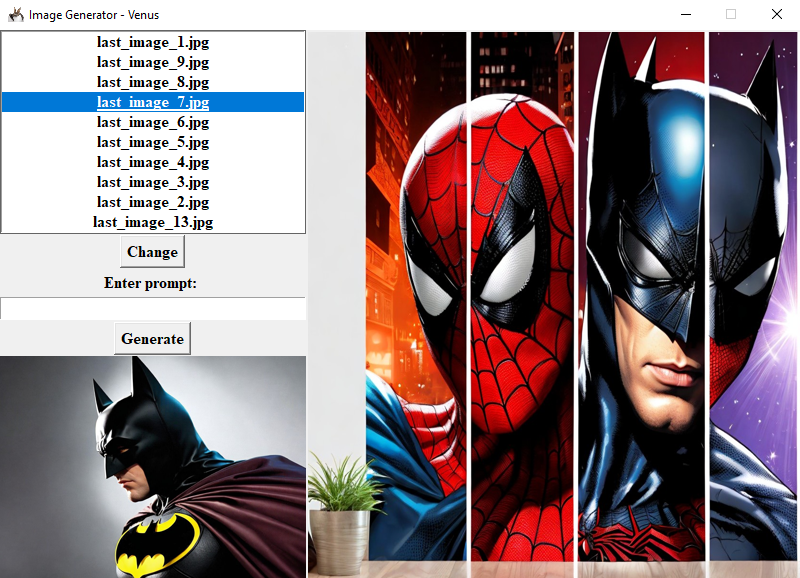
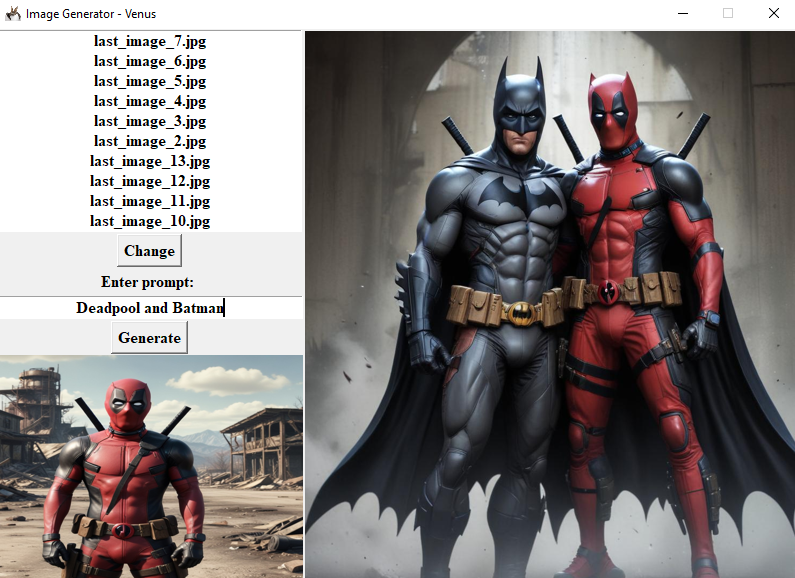